In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
RESULTS_DIR = os.path.join("..", "results")
DATA_DIR = os.path.join(RESULTS_DIR, "data")
FIGURES_DIR = os.path.join(RESULTS_DIR, "figures")
RESULTS_DIR, DATA_DIR, FIGURES_DIR

('../results', '../results/data', '../results/figures')

In [3]:
HW_all_data = pd.read_csv(os.path.join(DATA_DIR, "HW_all.csv"))
SIM_all_data = pd.read_csv(os.path.join(DATA_DIR, "SIM_all.csv"))

In [4]:
SIM_all_data

,time,FrontL,FrontR,FrontC,BackL,BackR,BackC,FrontLL,FrontRR,direction,event,run_id
0,0.119,inf,inf,inf,inf,inf,inf,inf,inf,forward,NaN,0
1,0.208,52.262867,52.262166,5.844070,6.436893,6.439255,57.781360,5.924125,5.889624,forward,NaN,0
2,0.390,52.209889,52.210495,5.832923,6.450709,6.453554,57.882173,5.916069,5.881911,forward,NaN,0
3,0.569,52.213117,52.214252,5.833615,6.449909,6.452876,57.877036,5.916490,5.882500,forward,NaN,0
4,0.717,51.709888,51.712275,5.726920,6.585540,6.590366,58.855119,5.840958,5.806758,forward,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2497,1.920,52.266923,52.267077,5.845006,6.435630,6.438183,57.773045,5.924678,5.890417,forward,NaN,99
2498,2.037,52.271461,52.271968,5.845935,6.434597,6.437232,57.766086,5.925297,5.891167,forward,NaN,99
2499,2.165,52.264539,52.263876,5.844399,6.436498,6.438878,57.778603,5.924372,5.889883,forward,NaN,99
2500,2.281,52.263866,52.277741,5.845317,6.434785,6.440661,57.780226,5.922937,5.892921,forward,NaN,99


In [5]:
HW_all_data.direction.unique(), HW_all_data.run_id.unique(), HW_all_data.event.unique()

(array(['forward', nan, 'backward', 'right'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([nan, 'obstacle'], dtype=object))

In [6]:
SIM_all_data.direction.unique(), SIM_all_data.run_id.unique(), SIM_all_data.event.unique()

(array(['forward', 'backward', 'right'], dtype=object),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([nan, 'obstacle'], dtype=object))

In [7]:
def plot_sensor_readings(
    mode,
    data,
    direction,
    run_id,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the given direction and run_id
    filtered_data = data[(data["direction"] == direction) & (data["run_id"] == run_id)]

    # List of sensor columns

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        plt.plot(filtered_data["time"], filtered_data[sensor], label=sensor)

    plt.xlabel("Time")
    plt.ylabel("Sensor Readings")
    plt.title(
        f"Sensor Readings for {direction.capitalize()} Direction (run_id={run_id} / {mode})"
    )
    plt.legend()
    plt.show()

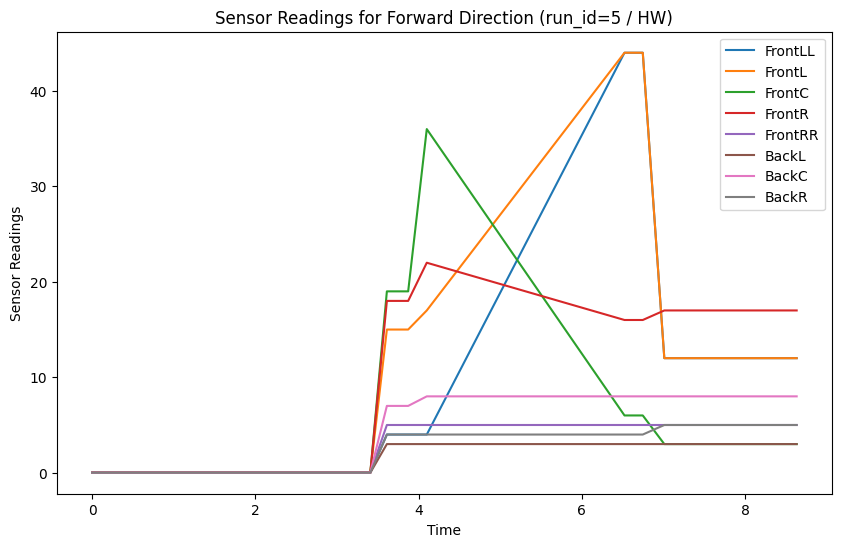

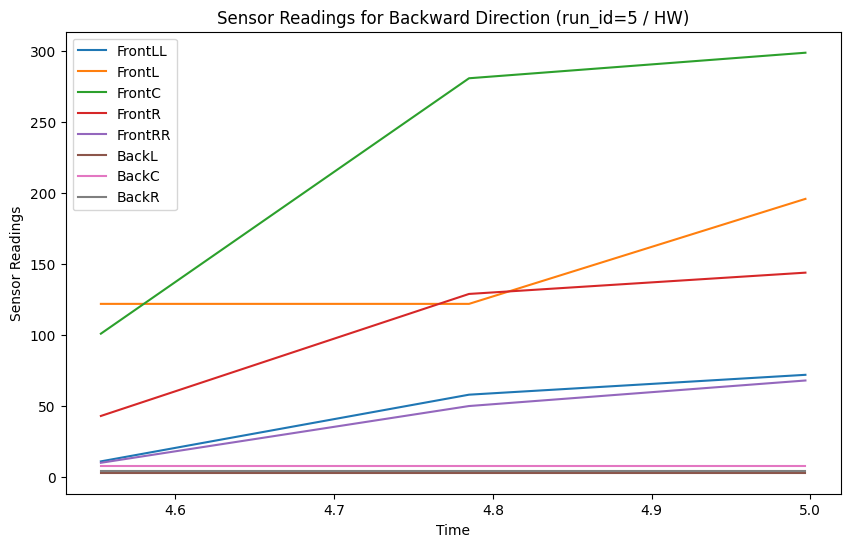

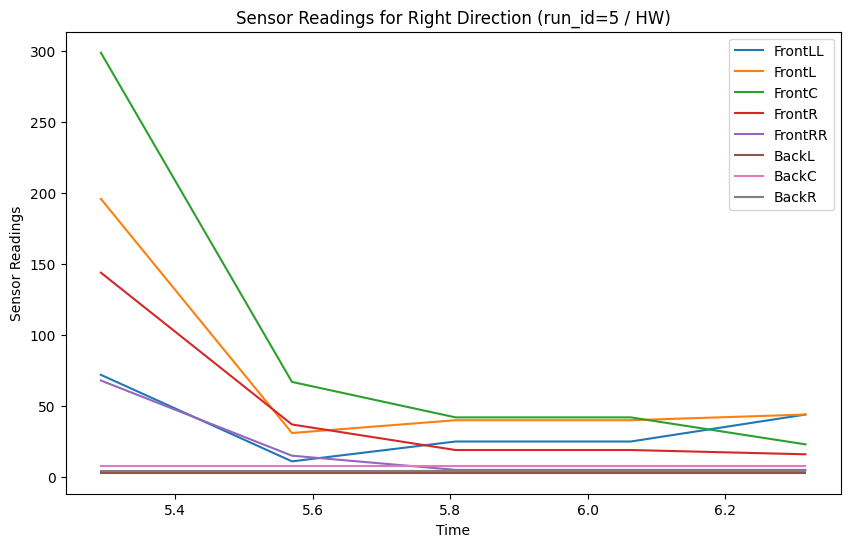

In [8]:
plot_sensor_readings("HW" ,HW_all_data, "forward", 5)
plot_sensor_readings("HW" ,HW_all_data, "backward", 5)
plot_sensor_readings("HW" ,HW_all_data, "right", 5)

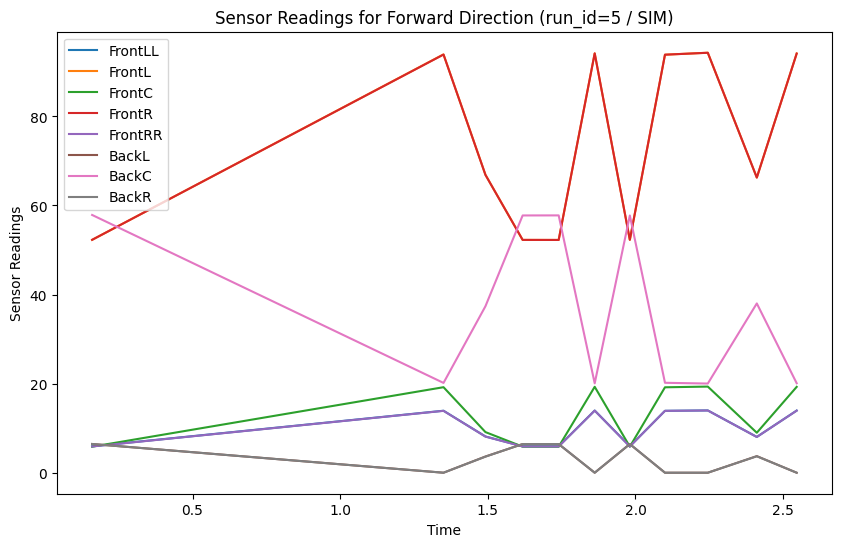

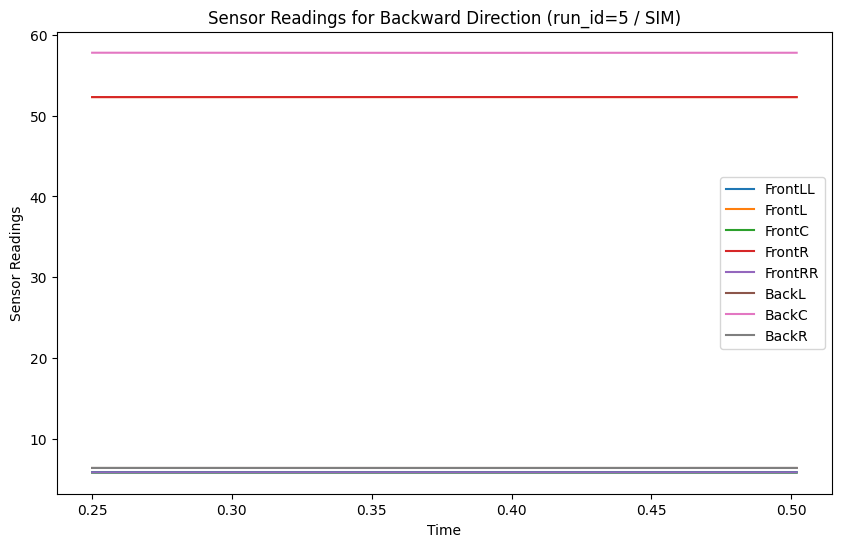

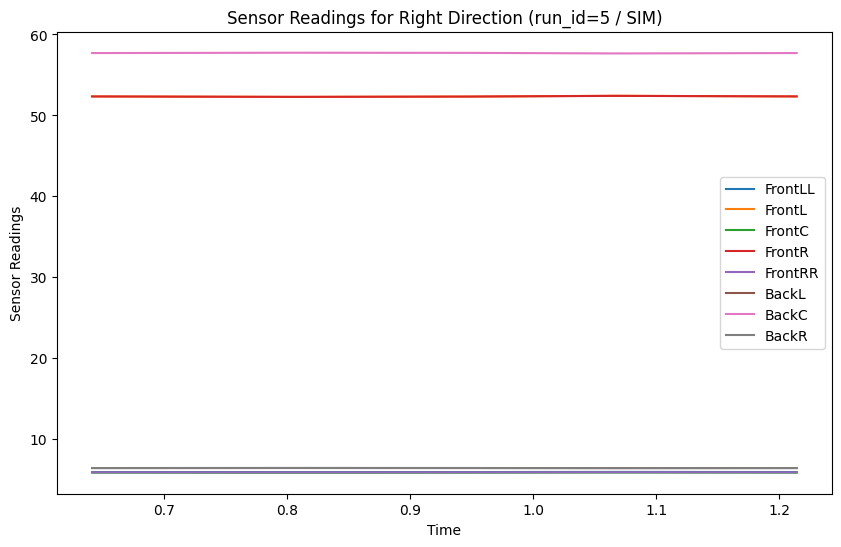

In [9]:
plot_sensor_readings("SIM", SIM_all_data, "forward", 5)
plot_sensor_readings("SIM", SIM_all_data, "backward", 5)
plot_sensor_readings("SIM", SIM_all_data, "right", 5)

In [10]:
def plot_avg_sensor_readings(
    mode,
    data,
    direction,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the given direction
    filtered_data = data[data["direction"] == direction]

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = filtered_data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title(
        f"Average Sensor Readings for {direction.capitalize()} Direction Across All Runs ({mode})"
    )
    plt.legend()
    plt.show()

In [11]:
FRONT_SENSORS = ["FrontLL", "FrontL", "FrontC", "FrontR", "FrontRR"]
BACK_SENSORS = ["BackL", "BackC", "BackR"]

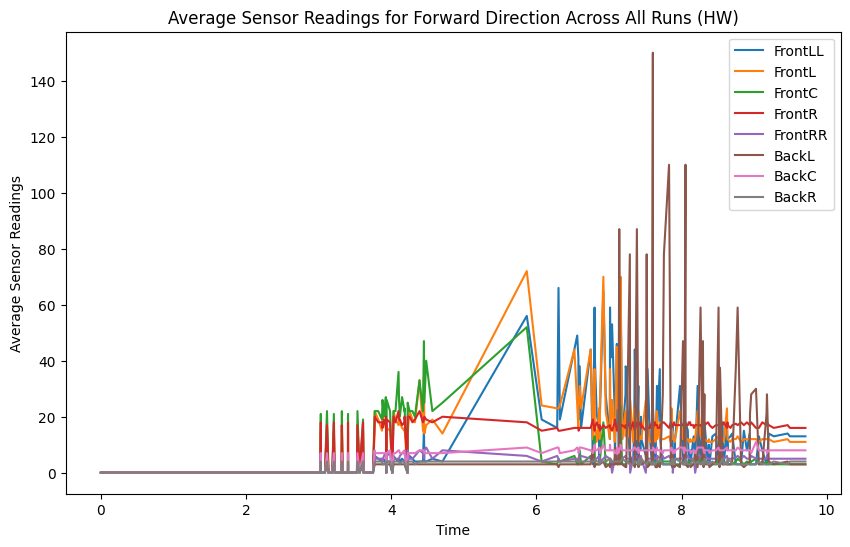

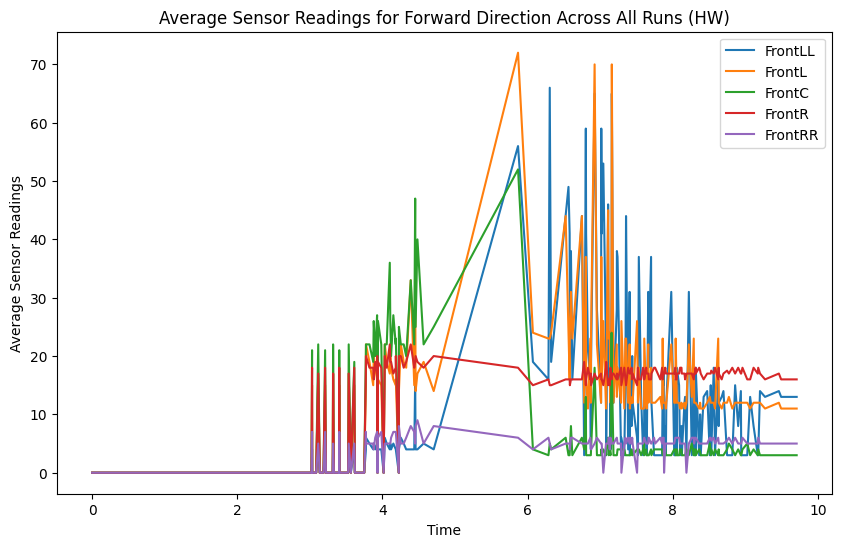

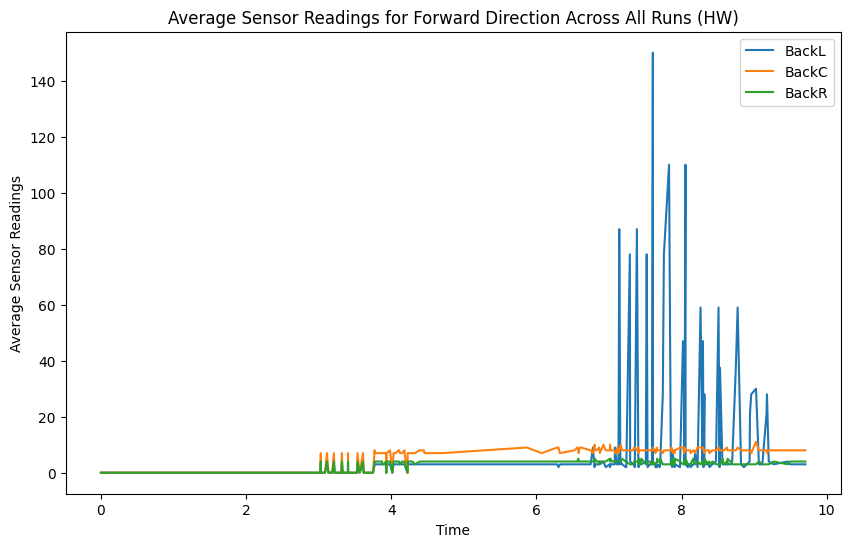

In [12]:
plot_avg_sensor_readings("HW", HW_all_data, "forward"),
plot_avg_sensor_readings("HW", HW_all_data, "forward", FRONT_SENSORS),
plot_avg_sensor_readings("HW", HW_all_data, "forward", BACK_SENSORS)

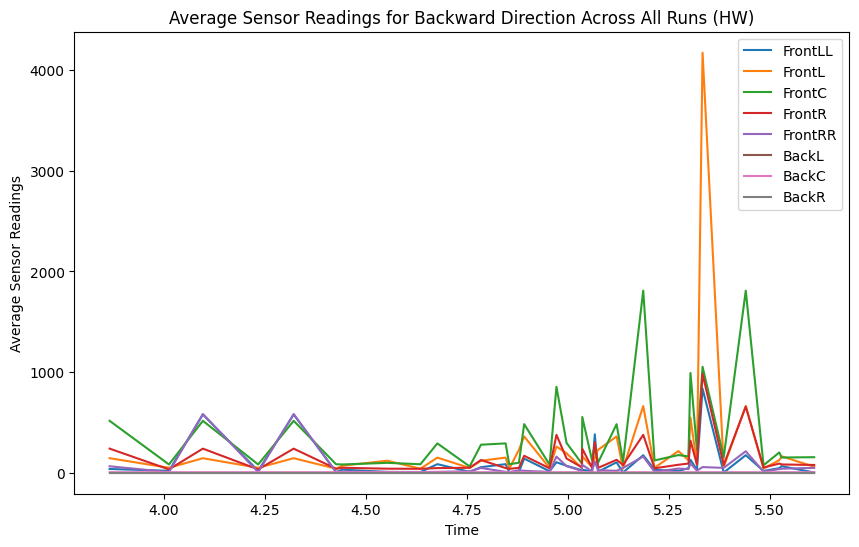

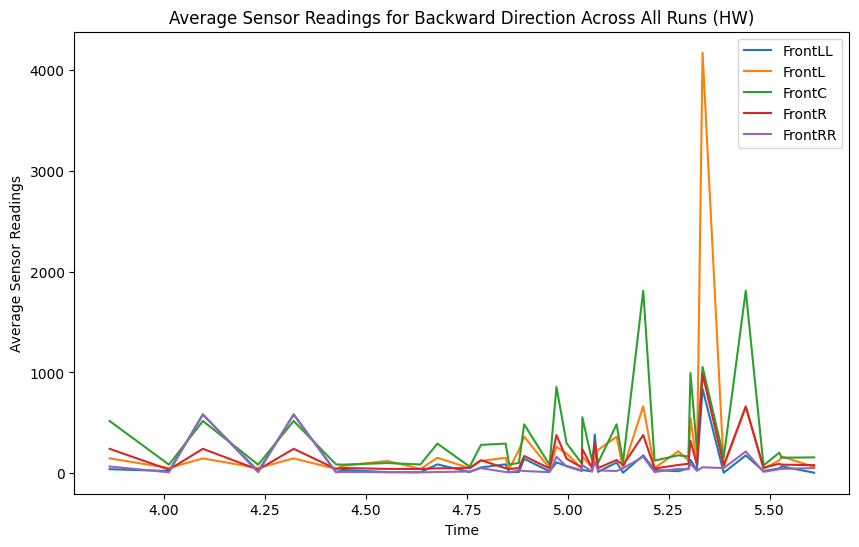

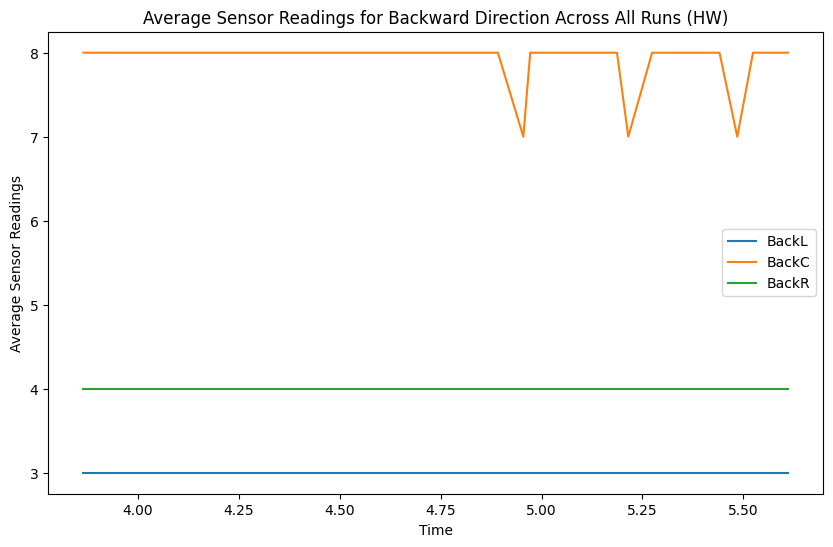

In [13]:
plot_avg_sensor_readings("HW", HW_all_data, "backward"),
plot_avg_sensor_readings("HW", HW_all_data, "backward", FRONT_SENSORS),
plot_avg_sensor_readings("HW", HW_all_data, "backward", BACK_SENSORS)

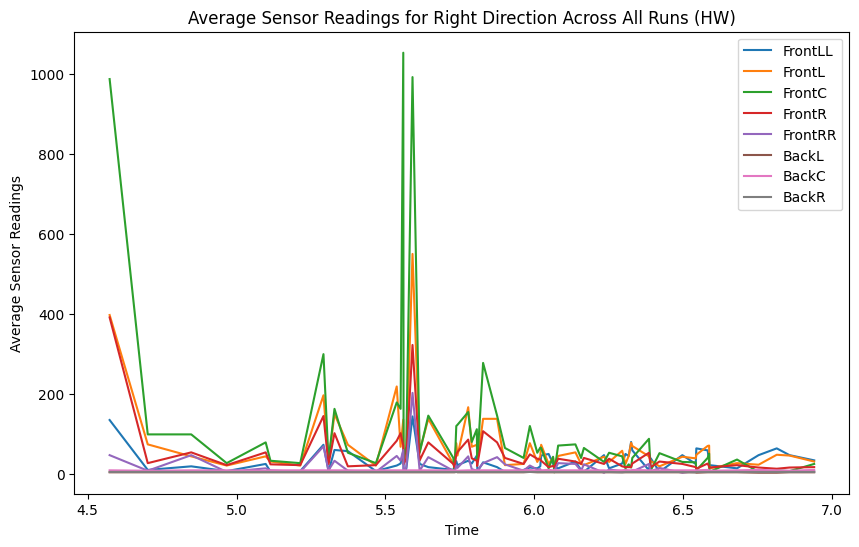

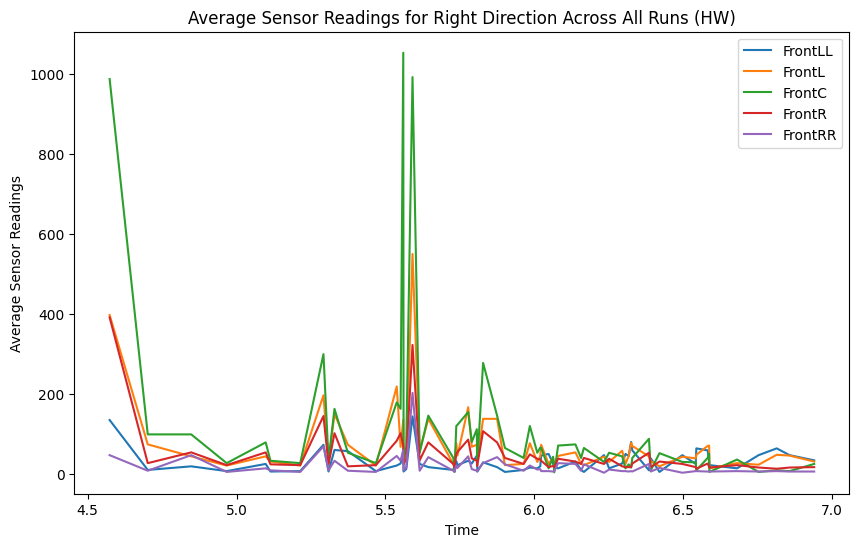

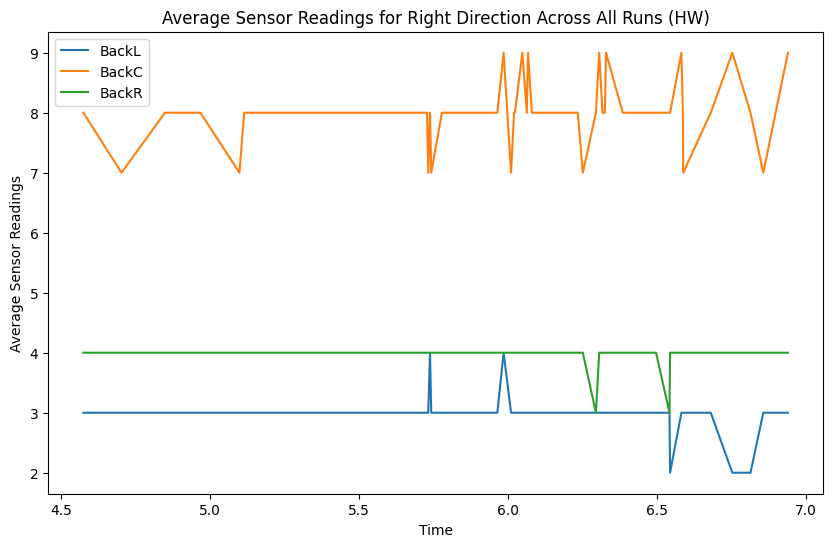

In [14]:
plot_avg_sensor_readings("HW", HW_all_data, "right"),
plot_avg_sensor_readings("HW", HW_all_data, "right", FRONT_SENSORS),
plot_avg_sensor_readings("HW", HW_all_data, "right", BACK_SENSORS)

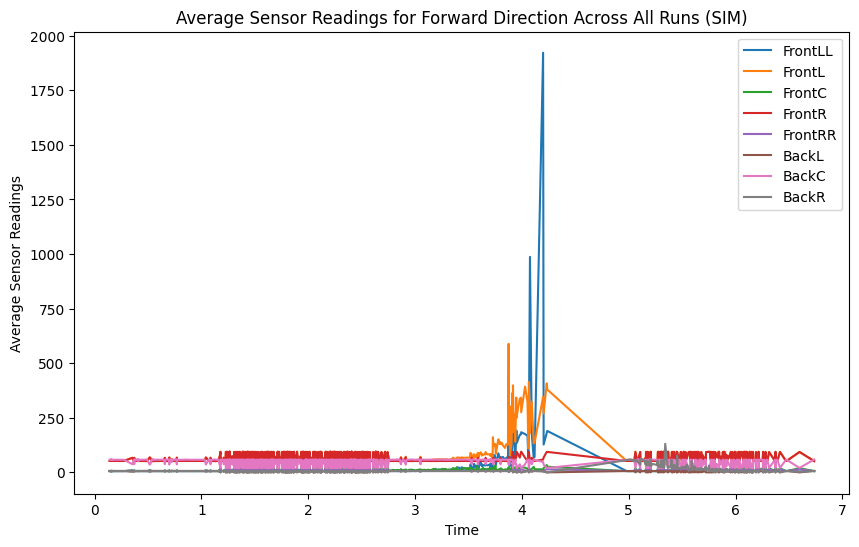

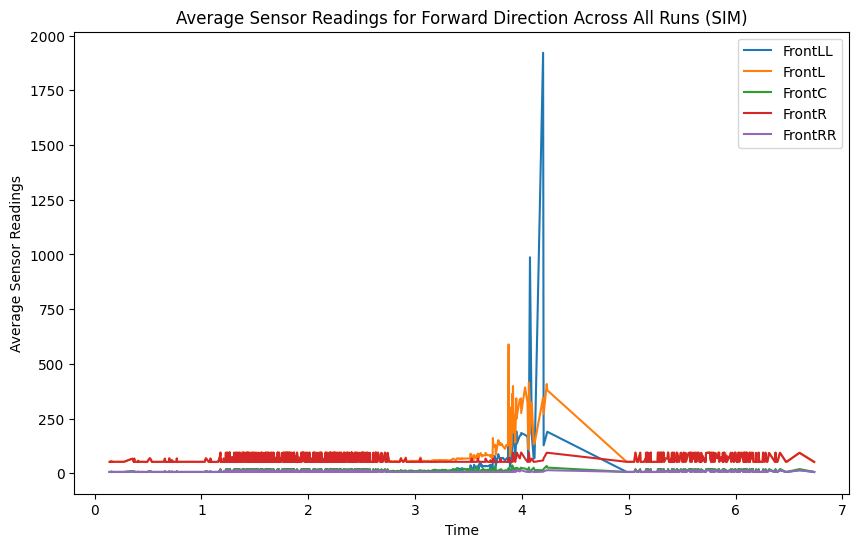

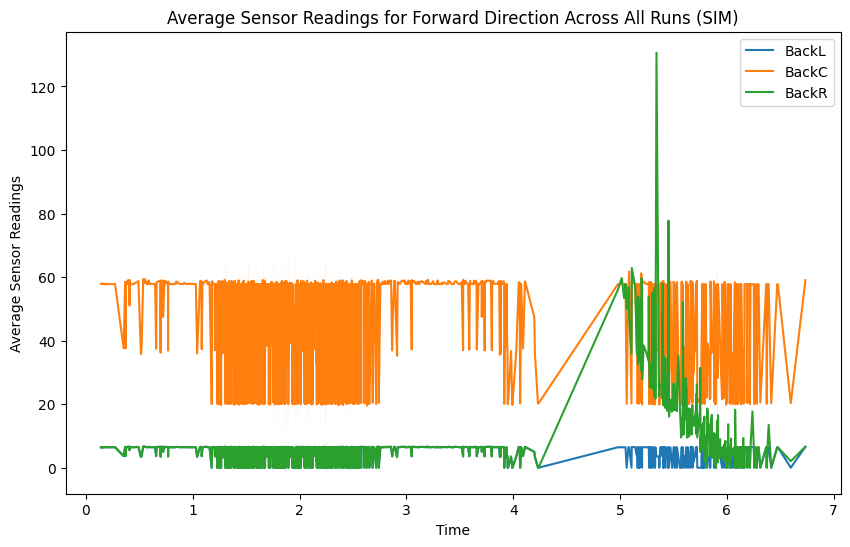

In [15]:
plot_avg_sensor_readings("SIM", SIM_all_data, "forward"),
plot_avg_sensor_readings("SIM", SIM_all_data, "forward", FRONT_SENSORS),
plot_avg_sensor_readings("SIM", SIM_all_data, "forward", BACK_SENSORS)

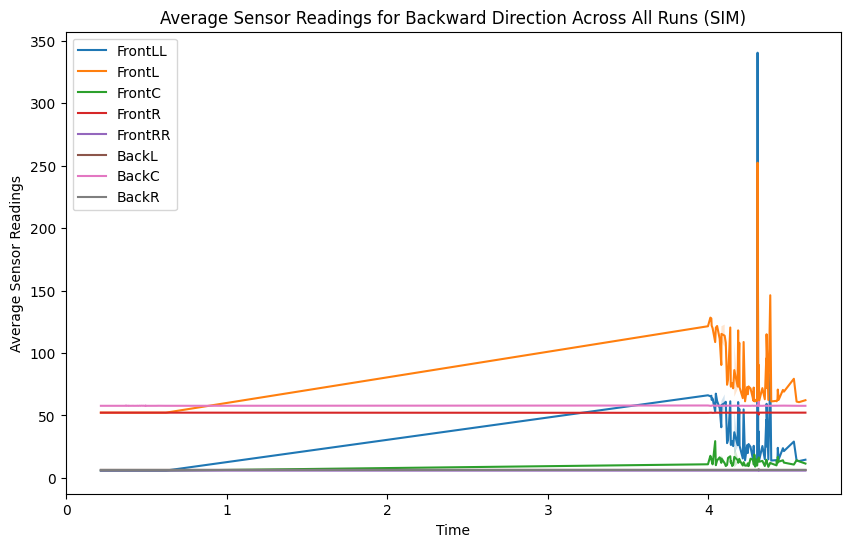

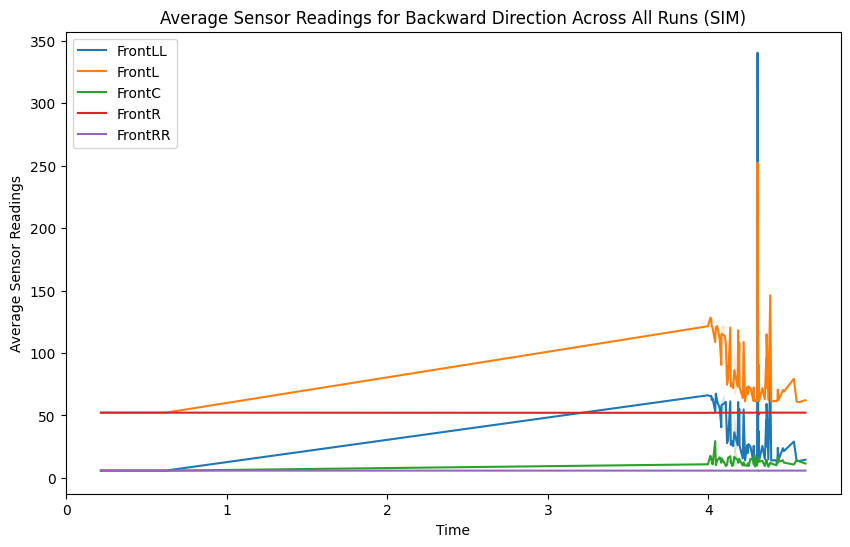

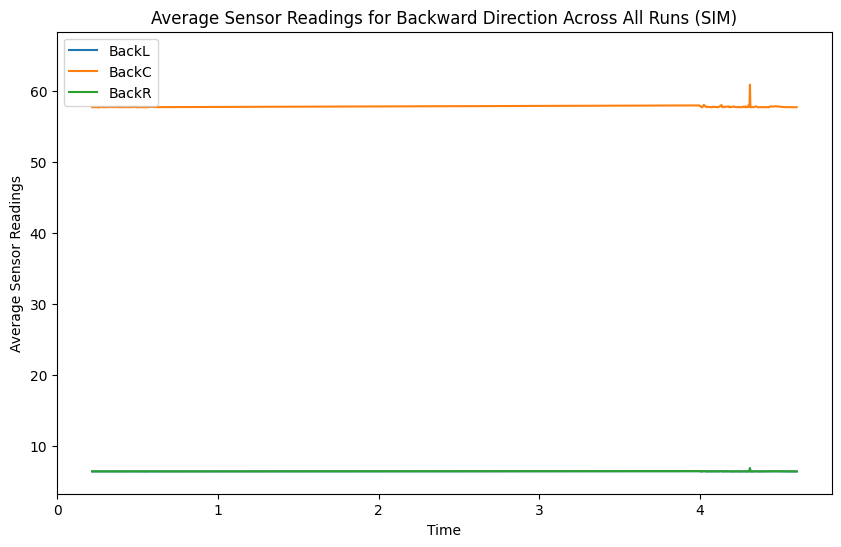

In [16]:
plot_avg_sensor_readings("SIM", SIM_all_data, "backward"),
plot_avg_sensor_readings("SIM", SIM_all_data, "backward", FRONT_SENSORS),
plot_avg_sensor_readings("SIM", SIM_all_data, "backward", BACK_SENSORS)

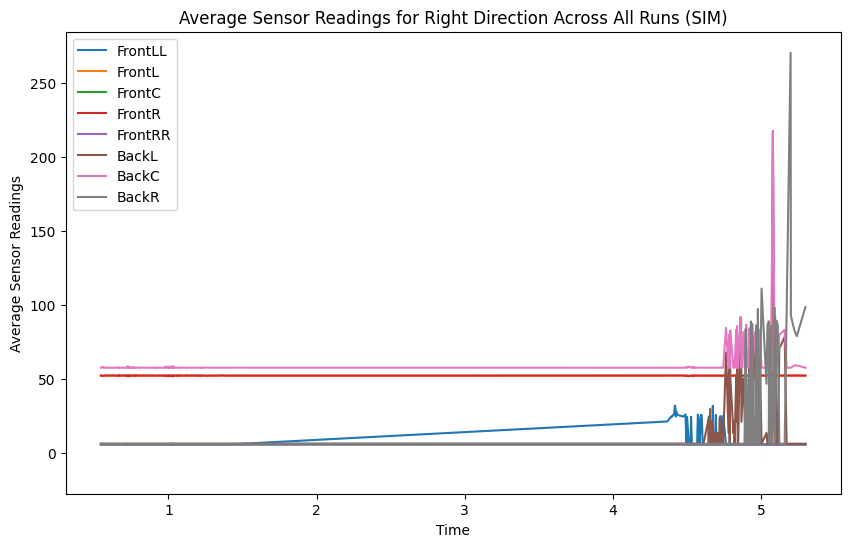

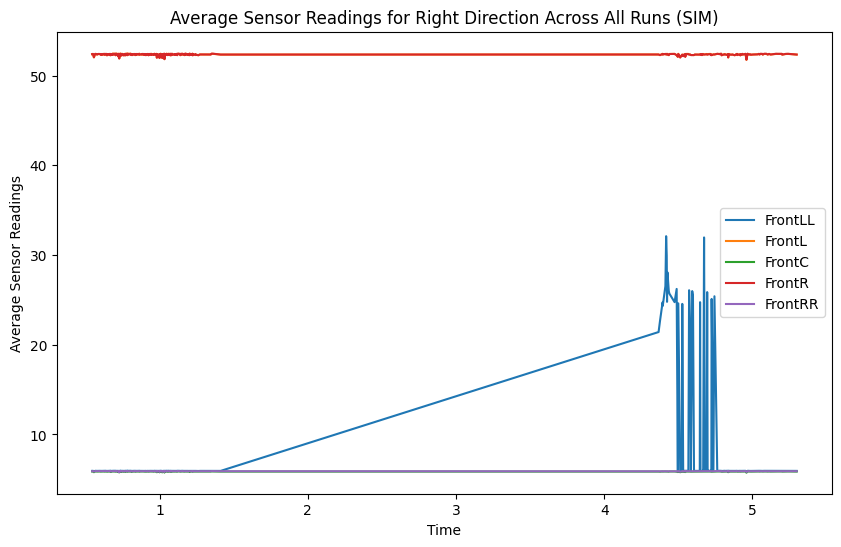

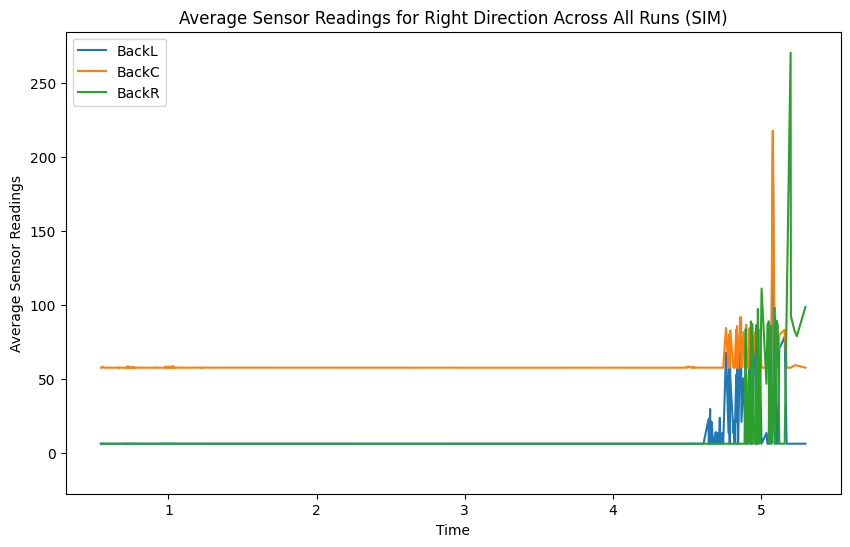

In [17]:
plot_avg_sensor_readings("SIM", SIM_all_data, "right"),
plot_avg_sensor_readings("SIM", SIM_all_data, "right", FRONT_SENSORS),
plot_avg_sensor_readings("SIM", SIM_all_data, "right", BACK_SENSORS)

In [18]:
def plot_avg_sensor_readings_all_runs(
    mode,
    data,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title(f"Average Sensor Readings Across All Runs ({mode})")
    plt.legend()
    plt.show()

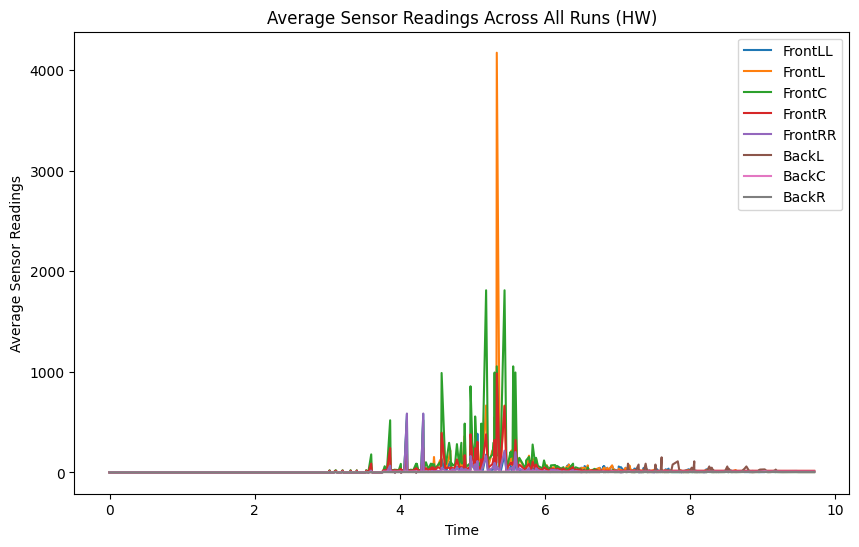

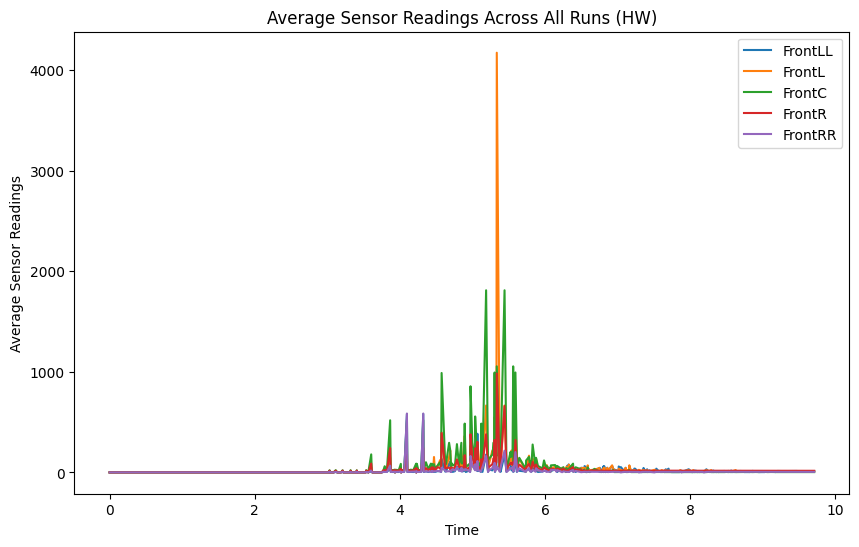

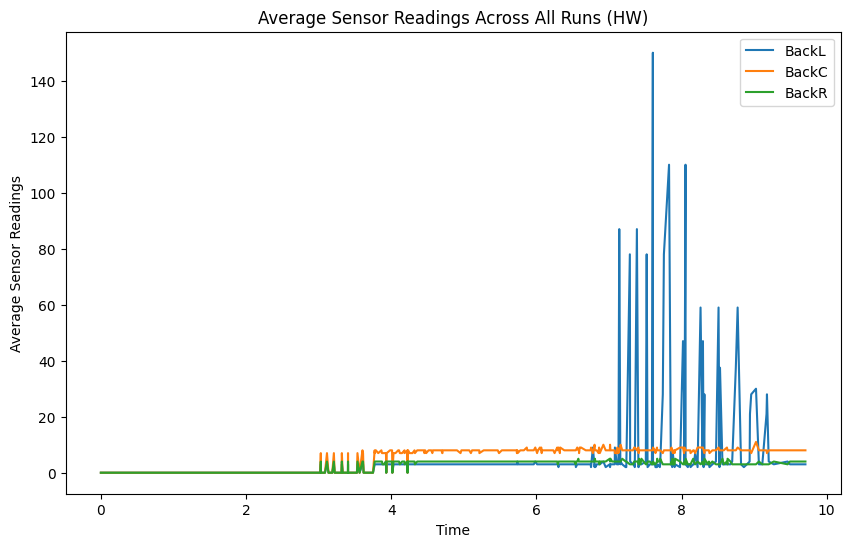

In [19]:
plot_avg_sensor_readings_all_runs("HW", HW_all_data),
plot_avg_sensor_readings_all_runs("HW", HW_all_data, FRONT_SENSORS),
plot_avg_sensor_readings_all_runs("HW", HW_all_data, BACK_SENSORS)

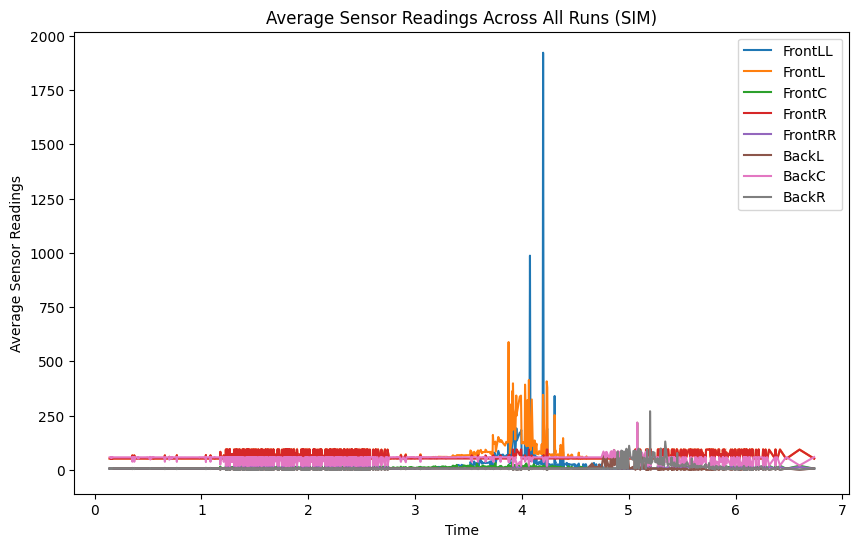

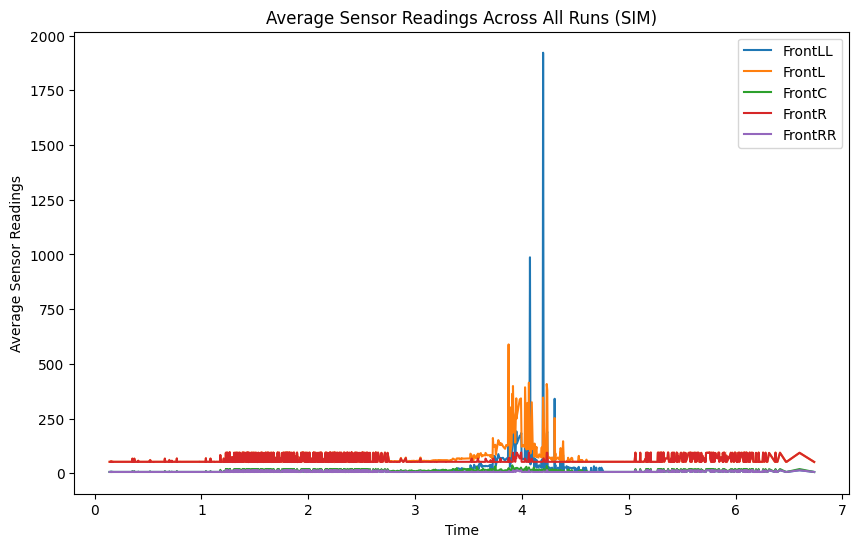

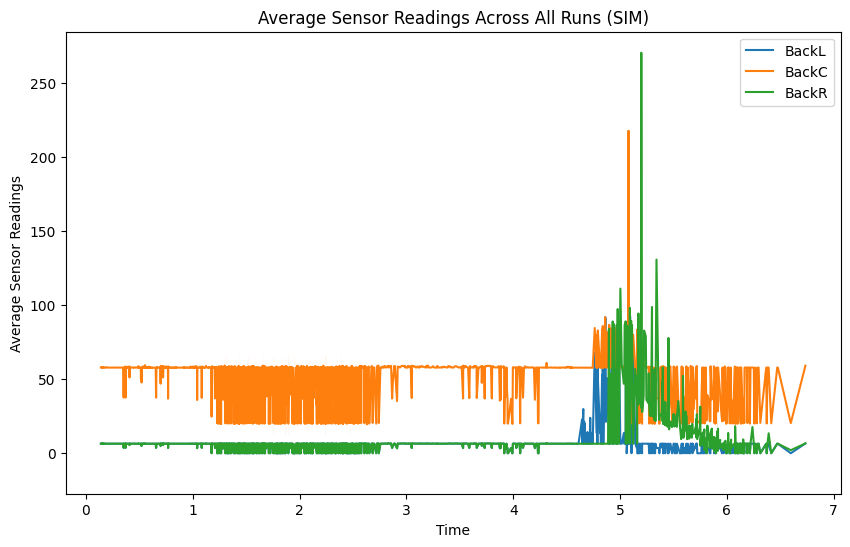

In [20]:
plot_avg_sensor_readings_all_runs("SIM", SIM_all_data),
plot_avg_sensor_readings_all_runs("SIM", SIM_all_data, FRONT_SENSORS),
plot_avg_sensor_readings_all_runs("SIM", SIM_all_data, BACK_SENSORS)

In [21]:
def plot_avg_obstacle_readings(
    mode,
    data,
    sensors=[
        "FrontLL",
        "FrontL",
        "FrontC",
        "FrontR",
        "FrontRR",
        "BackL",
        "BackC",
        "BackR",
    ],
):
    # Filter the data for the 'obstacle' event
    filtered_data = data[data["event"] == "obstacle"]

    # Create a line plot for each sensor
    plt.figure(figsize=(10, 6))
    for sensor in sensors:
        # Group by time and calculate mean and standard deviation
        grouped = filtered_data.groupby("time")[sensor].agg(["mean", "std"])

        # Plot mean line
        plt.plot(grouped.index, grouped["mean"], label=sensor)

        # Plot shaded area for standard deviation
        plt.fill_between(
            grouped.index,
            grouped["mean"] - grouped["std"],
            grouped["mean"] + grouped["std"],
            alpha=0.2,
        )

    plt.xlabel("Time")
    plt.ylabel("Average Sensor Readings")
    plt.title(f"Average Sensor Readings for 'Obstacle' Events Across All Runs ({mode})")
    plt.legend()
    plt.show()

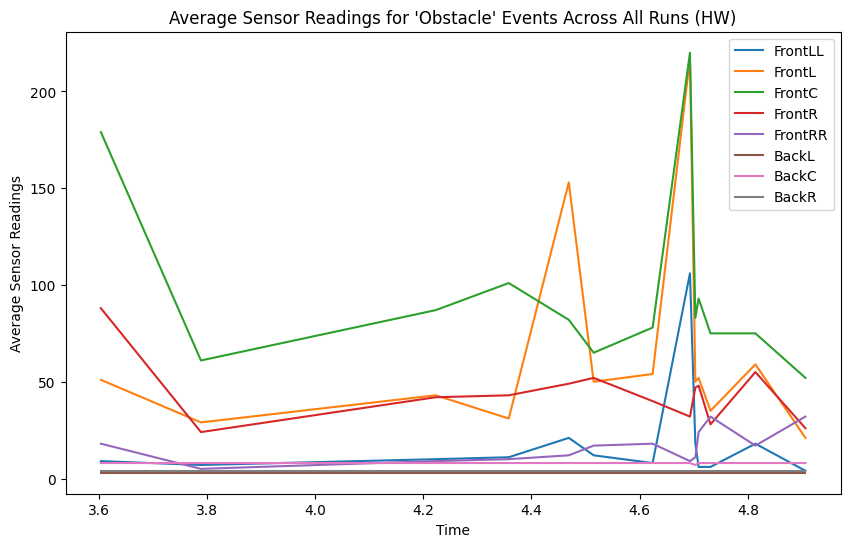

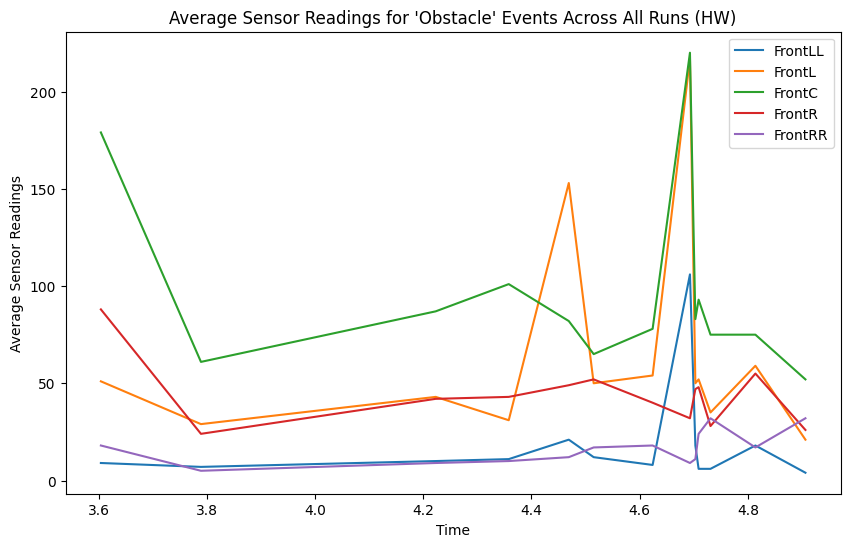

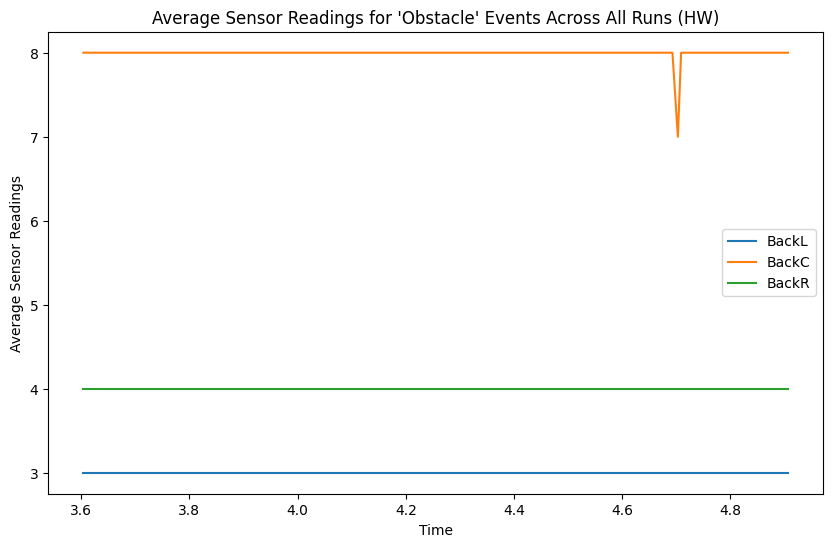

In [22]:
plot_avg_obstacle_readings("HW", HW_all_data),
plot_avg_obstacle_readings("HW", HW_all_data, FRONT_SENSORS),
plot_avg_obstacle_readings("HW", HW_all_data, BACK_SENSORS)

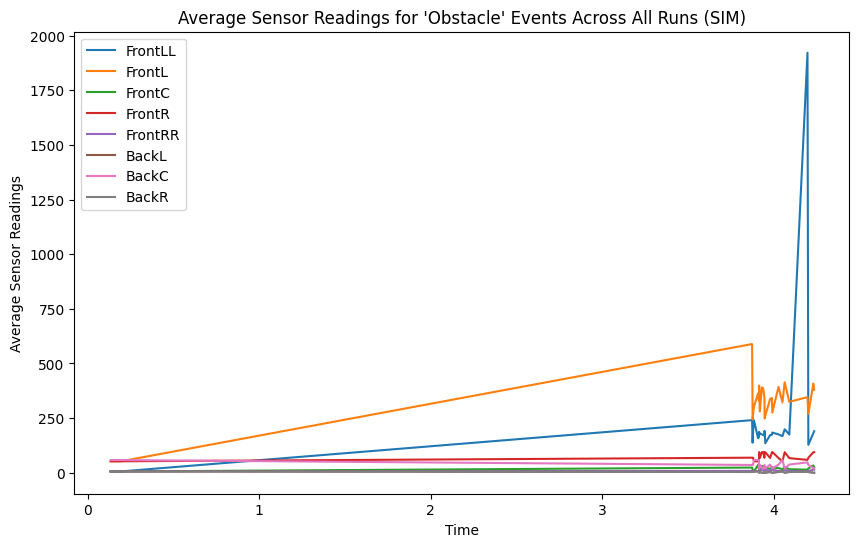

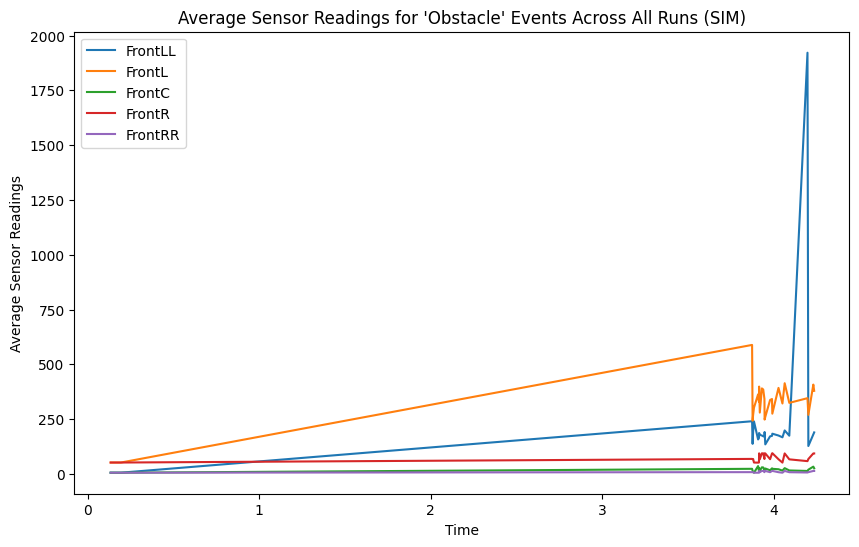

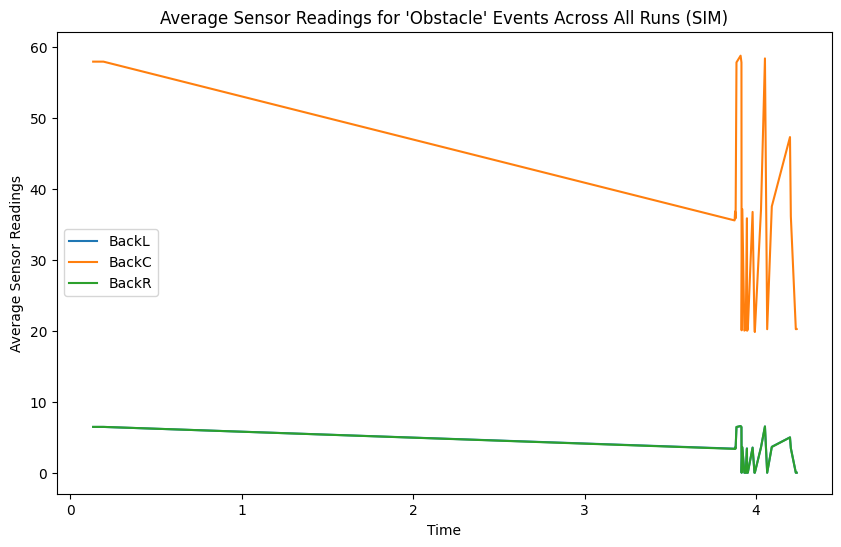

In [23]:
plot_avg_obstacle_readings("SIM", SIM_all_data),
plot_avg_obstacle_readings("SIM", SIM_all_data, FRONT_SENSORS),
plot_avg_obstacle_readings("SIM", SIM_all_data, BACK_SENSORS)